In [2]:
!unzip /content/archive.zip -d /content/

Archive:  /content/archive.zip
  inflating: /content/Mall_Customers.csv  


In [3]:
import pandas as pd

df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:

from sklearn.preprocessing import StandardScaler


X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

display(X.head())
display(X_scaled[:5])

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

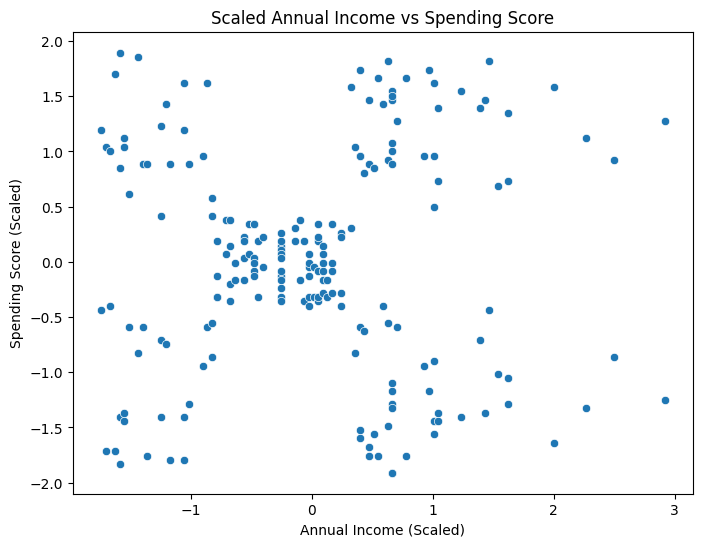

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1])
plt.title('Scaled Annual Income vs Spending Score')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()

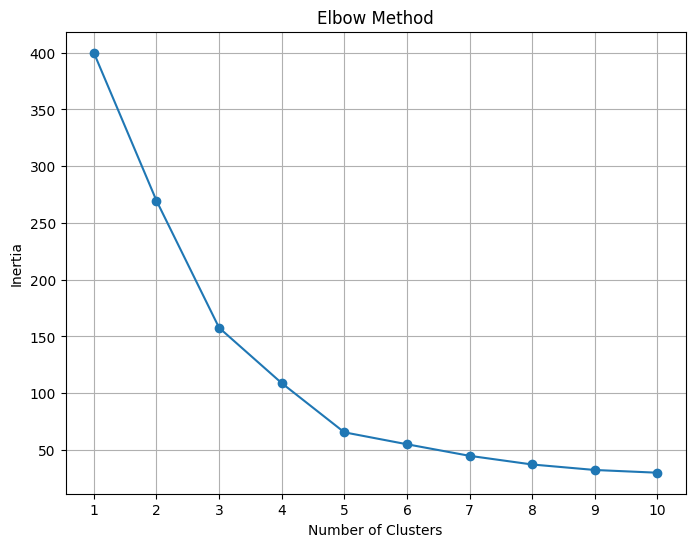

In [8]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

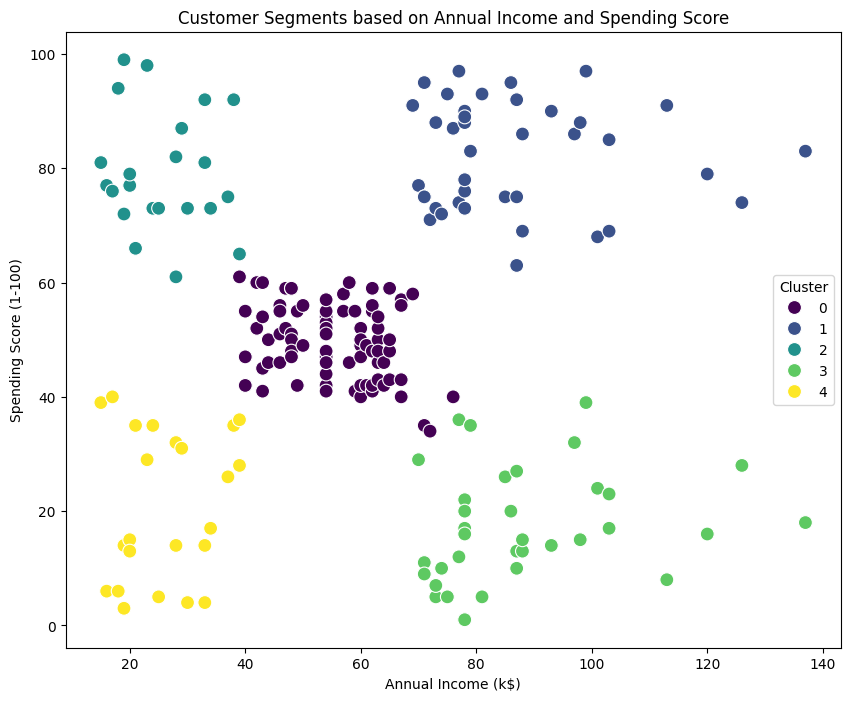

In [9]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = dbscan_clusters

display(df.head())

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,DBSCAN_Cluster
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,4,0


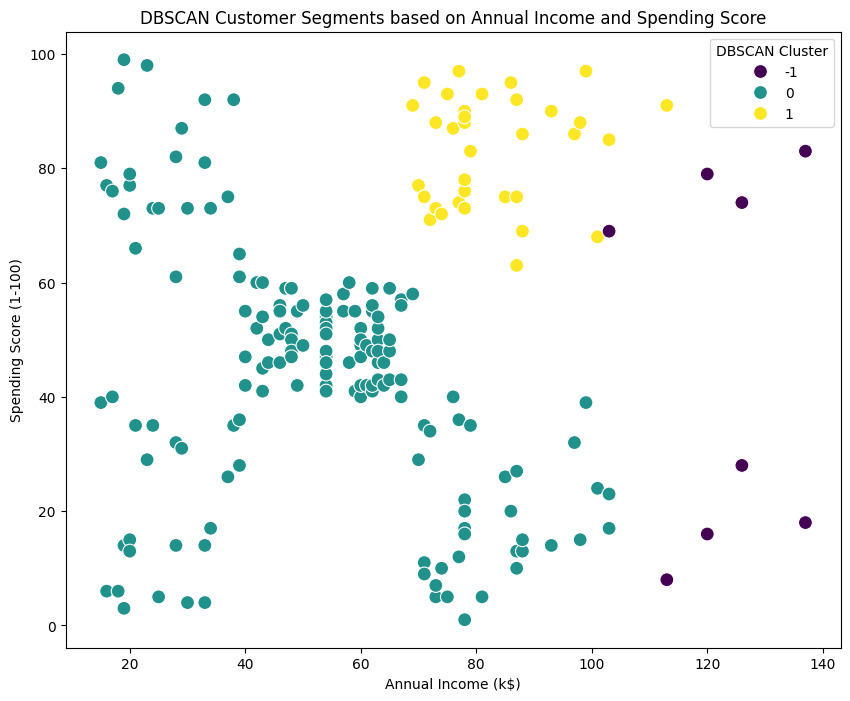

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='viridis', s=100)
plt.title('DBSCAN Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='DBSCAN Cluster')
plt.show()

In [12]:
cluster_characteristics = df.groupby('DBSCAN_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].describe()
display(cluster_characteristics)

Annual Income (k$)                                        \
                            count        mean        std    min     25%   
DBSCAN_Cluster                                                            
-1                            8.0  122.750000  11.510864  103.0  118.25   
 0                          157.0   52.490446  21.811141   15.0   37.00   
 1                           35.0   82.542857  10.925800   69.0   74.50   

                                     Spending Score (1-100)             \
                  50%     75%    max                  count       mean   
DBSCAN_Cluster                                                           
-1              123.0  128.75  137.0                    8.0  46.875000   
 0               54.0   65.00  103.0                  157.0  43.101911   
 1               78.0   87.50  113.0                   35.0  82.800000   

                                                          
                      std   min   25%   50%    75%   max  
DBSCAN_Cluster                                            
-1              32.108911   8.0  17.5  48.5  75.25  83.0  
 0              22.249225   1.0  28.0  46.0  55.00  99.0  
 1               9.498607  63.0  75.0  86.0  90.50  97.0